# Final Project - "Sales Forecasting and Optimizng Warehouse Operations for Walmart Stores"

Team members :
1. Mahesh Rajendra
2. Bhavitha Bojja
3. Mamatha Singh
4. Nandhini Srirapu

## Abstract

This project focuses on sales forecasting and warehouse management optimization for 45 Walmart stores over a three-year period. The dataset includes variables such as store ID, department, sales, CPI, fuel prices, holidays, temperature, store size, and type, enabling comprehensive analysis. The objective is to predict future sales trends and derive actionable insights to enhance warehouse operations.

Various predictive models were employed, including Random Forest, XGBoost, an ensemble of Random Forest and XGBoost, ARIMA, and TimeGPT (a transformer-based model), to forecast sales for the next six months. The project introduces Sales Velocity as a key performance indicator (KPI) to measure inventory movement efficiency.

To support decision-making, a multi-level dashboard was developed. This dashboard provides detailed analytics on overall, store-wise, and department-wise sales. It also visualizes key KPIs such as Sales Velocity, top 10 performing stores and departments, and the best-performing months. These insights enable Walmart to align inventory and warehouse management strategies with forecasted demand, enhancing operational efficiency and customer satisfaction.

This comprehensive approach demonstrates the potential of integrating predictive analytics and visualization tools for effective retail management and decision-making.

## Data Summary

- This is historical sales data for 45 stores loacated in different regions, each store contains a number of dapartments.

- Intially data is in three different files named Stores, Features, Sales.

**Stores Data**

- Store: Unique identifier for each store.

- Type: Category or type of the store.

- Size: Physical size of the store in square feet.

**Features Data**

- Store: Unique identifier for each store.

- Date: Weekly timestamp (YYYY-MM-DD).

- Temperature: Average temperature in the region (°F).

- Fuel_Price: Regional fuel price (USD per gallon).

- MarkDown1-5: Anonymized promotional markdown data; available after Nov 2011. Missing values are marked as NA.

- CPI: Consumer Price Index, representing average price levels for goods and services.

- Unemployment: Regional unemployment rate (percentage).

- IsHoliday: Indicates if the week includes a special holiday (True/False).


**Sales Data**

- Store: Unique identifier for each store.

- Dept: Unique identifier for each department.

- Date: Weekly timestamp of sales data (YYYY-MM-DD).

- Weekly_Sales: Revenue generated by a department within a store in a specific week (USD).

- IsHoliday: Indicates if the week includes a special holiday (True/False).


[Source](https://https://github.com/Ernest-30/Walmart-Retail-sales-Analysis/tree/main)



## Research Questions


**1. Impact of Holidays on Sales Performance**

- How do weekly sales trends differ between holiday and non-holiday weeks across stores and departments?

**2. Economic Indicators and Sales Correlation**

- What is the relationship between economic factors (fuel price, CPI, and unemployment rate) and weekly sales?

**3. Sales Velocity as a KPI for Warehouse Management**

 - How does sales velocity vary across stores, departments, and time periods, and what insights can it provide for warehouse stock optimization?




 ## Methodology

 1. **Data Acquisition** : This data was gathered from the github repository, which has three distinct files with the names Stores, Features, and Sales.

 2. **Data Wrangling** : The central or main dataset, which consisted of 17 columns and 421,570 rows with "weekly_sales" as the response variable, was created through merging the data from three sources.

 3. **Data Cleaning** : Dealt with finding and eliminating irregularities in the quality of the data.

  - There are no null values in the dataset other than in the markdown columns; we examined those variables and determined they were not relevant to our use case, so we removed them.

4. **Exploratory Data Analysis** : The attributes of each column are thoroughly examined by graphically and statisticaly to comprehend its characteristics and also to answer the research quations.

5. **Feature Engineering**: This stage is carried out repeatedly during the project since each predictive mpdel and operation for a different hierarchy required a new dataset structure, so the dataset is modeled appropriately. Among the significant changes are:

  - Retrieved holidays for the needed dates from a Nixtala library and combined them with the main dataset.
  - Investigated and computed "Sales velocity," a KPI derived from sales data that is used to gauge how quickly sales are occurring and to decide whether to refill in warehouses.

6. **Predective Models**: A bunch of predictive models were used to predict sales over the following six months, including TimeGPT (a transformer-based model), ARIMA, Random Forest, XGBoost, and an ensemble of Random Forest and XGBoost.

  The model's performance was assessed using Symmentric Mean Absolute Percentage Error(SMAPE) and Mean Absolute Error (MAE) as metrics.


7. **Select Models** : After considering all the Matrics TimeGPT has best SMAPE score than other models and is showing better results on the Plots, Thus selected this model for the Dashboard.

8. **Developing and Deploying Dashboard**: A dashboard with multiple levels was created. This dashboard offers comprehensive data on sales by department, shop, and overall. Additionally, it displays important KPIs like sales velocity, the top ten departments and locations, and the months with the highest performance. Walmart is able to improve operational efficiency and customer satisfaction by using these insights to match warehouse management and inventory strategies with anticipated demand.

  This Dashboard is built on Streamlit and deployed on HuggingFace Spaces.





## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URLs for the Excel files
stores_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/stores%20data-set.csv'
features_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/Features%20data%20set.csv'
sales_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/sales%20data-set.csv'

In [ ]:
# Load the datasets from GitHub
stores_df = pd.read_csv(stores_url)
features_df = pd.read_csv(features_url)
sales_df = pd.read_csv(sales_url)

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
# Merge the Sales and Features datasets on 'Store' and 'Date'
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')

# Now, merge the result with the Stores dataset on 'Store'
combined_df = pd.merge(combined_df, stores_df, on='Store', how='left')

# Check the combined dataframe
combined_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
combined_df.shape

(421570, 17)

In [ ]:
aggregated_df = combined_df.copy() # use this datafrane for randomforest, xgboost

In [ ]:
df_ariima = combined_df.copy()  # use this datafrane for arima.

## Data Cleaning


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
combined_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


- Only Markdown features are having nulls in them as they contain values only after certain dates mentioned in data catalog.


In [ ]:
# Assuming markdown as catagorical feature
# Check by value counts
combined_df['MarkDown1'].value_counts()

,count
MarkDown1,
1.50,102
460.73,102
175.64,93
9264.48,75
1483.17,75
...,...
196.40,42
243.47,42
512.15,42


- If markdowns are catagorical variables they should have maximum of 10 catagiries, but we have more than 1000 rows unique which does not show the catagrical features.

- So we conclude that markdown features are not catagorical, and from the data catalog as it was mentioned as "anonymized data related to promotional markdowns" which was not clear.

In [ ]:
# Convert to date_time formate
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format = '%d/%m/%Y')

In [ ]:
min(combined_df['Date']), max(combined_df['Date'])

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

- so we have weekly data from January 2010 to Octomber 2012.

## Exploratory Data Analysis

In [ ]:
# Statistical summary
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829
MarkDown4,134967.0,3383.168256,0.22,504.22,1481.31,3595.04,67474.85,6292.384031


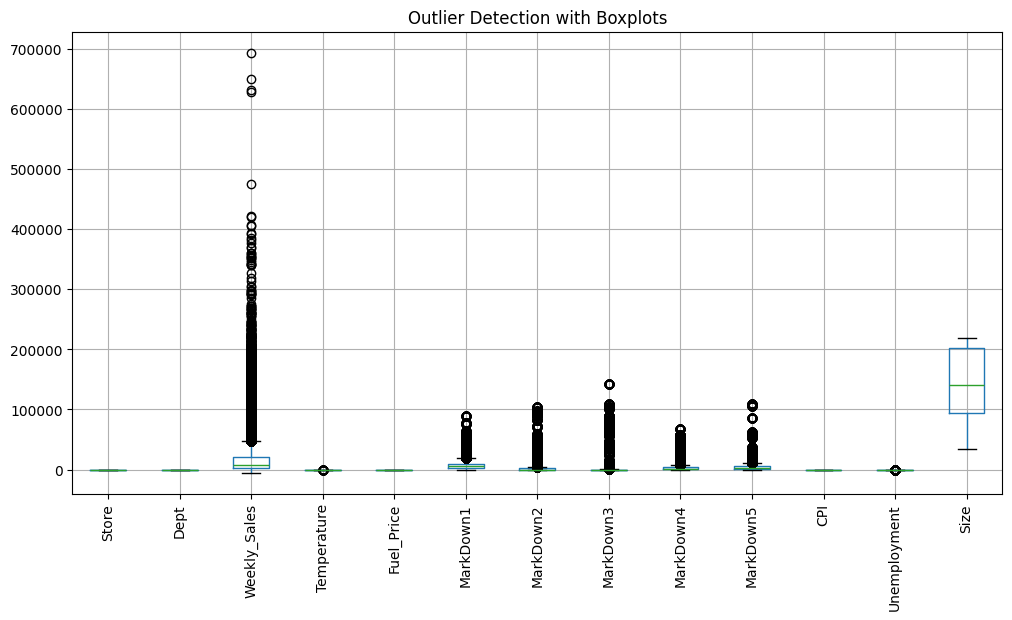

In [ ]:
# Boxplots for numerical columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns].boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Outlier Detection with Boxplots')
plt.show()


- The boxplot shows many outliers in "Weekly_Sales" and markdowns, indicating high variability, while other variables have smaller spreads. "Size" has a wider range but no extreme outliers.

- The outliers are not droped as they are time bounded, if we drop them are treat them by normalizing we may miss the temporal nature of the data and model could not recognise certain patterns.

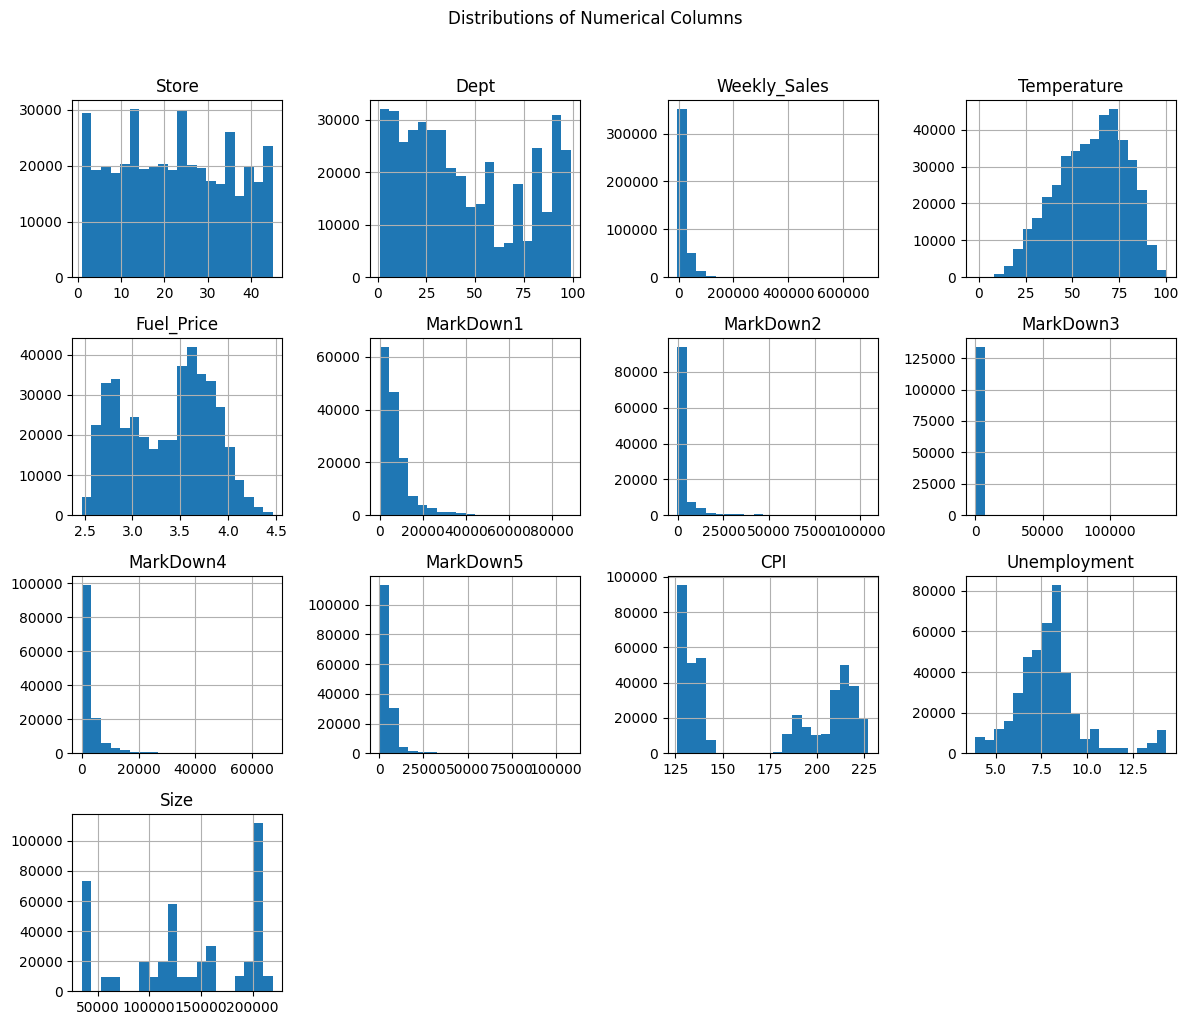

In [ ]:
# Histograms for numerical columns
combined_df[numeric_columns].hist(bins=20, figsize=(12, 10), layout=(4, 4))
plt.suptitle('Distributions of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()


The histograms show that "Weekly_Sales" and markdowns are highly skewed, while "Temperature," "Fuel_Price," and "Unemployment" have more even spreads and "Size" shows distinct peaks.

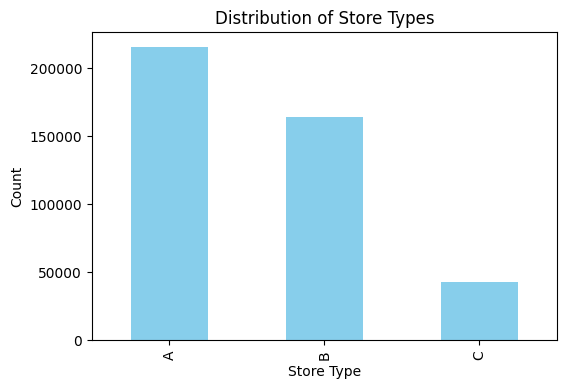

In [ ]:
# Bar plot for store types
combined_df['Type'].value_counts().plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


- From this graph we can say that the stores are catagorised in 3 types.

- Chart shows that Store Type A is the most common, followed by Type B, while Type C has the lowest count. This indicates Store Type A are more in number in our dataset.

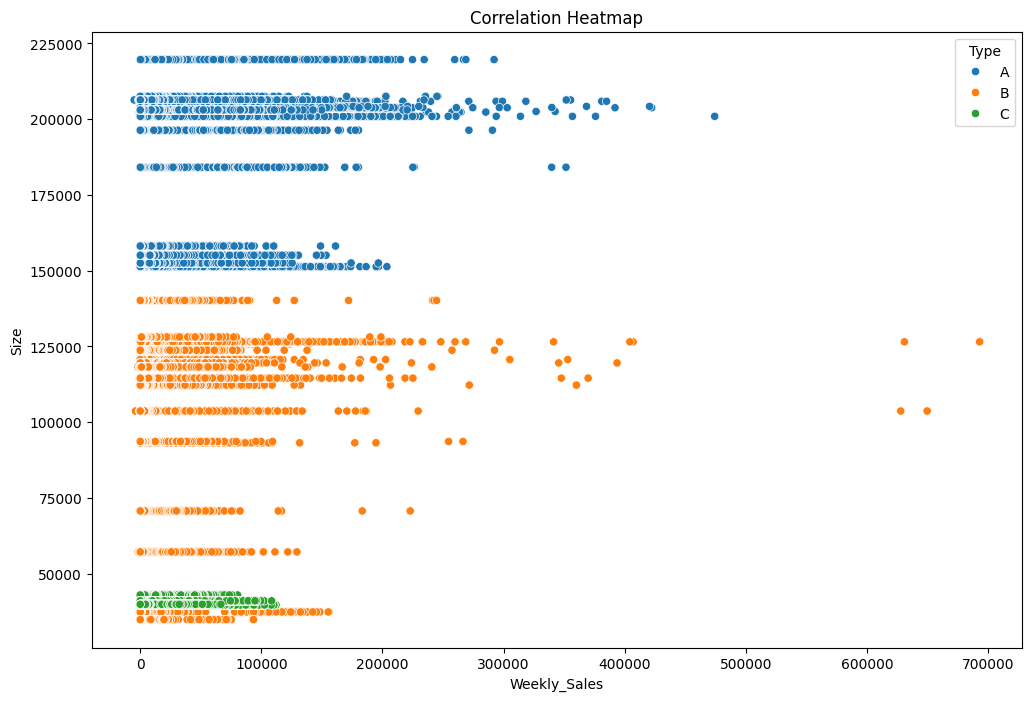

In [ ]:
# Scatter plot for size by sales across store types.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, y='Size', x='Weekly_Sales', hue = 'Type')
plt.title('Correlation Heatmap')
plt.show()


- From the plot we can see there are clusters formed indicating 3 types of stores depending on size feature :
  - Larger stores (Type A) are called as **Walmart Supercenters**, which has everything and offer a one-stop shopping experience.Are around 182,000 square feet.

  - Mid range stores (Type B) are called as **Walmart Discount Stores**, which offers electronics, apparel, toys, home furnishings, health and beauty aids, hardware.In about 106,000 square feet

  - Smaller stores (Type C) are called as **Walmart Neighborhood Market**,
   offers fresh produce, meat and dairy products, bakery and deli items, household supplies, health and beauty aids and a pharmacy. Each one is approximately 38,000 square feet.



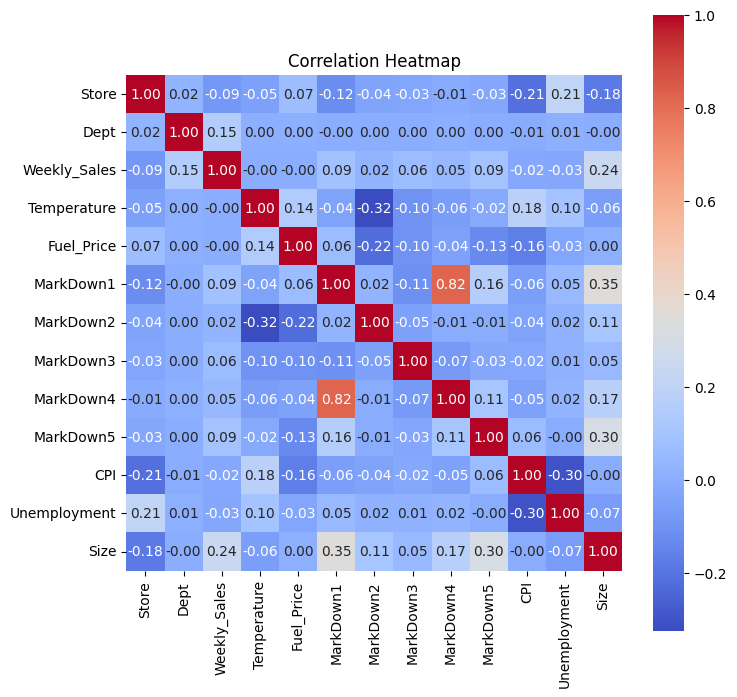

In [ ]:
# Correlation matrix
corr_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


- Unemployment and CPI shows negative correlation with weekly sales which indicates as unemployment rate or CPI increase (inflation) there will low sales.

- Size and weekly sales are positively correlated.which is true as supercenters will have more sales than neighborhood markests.

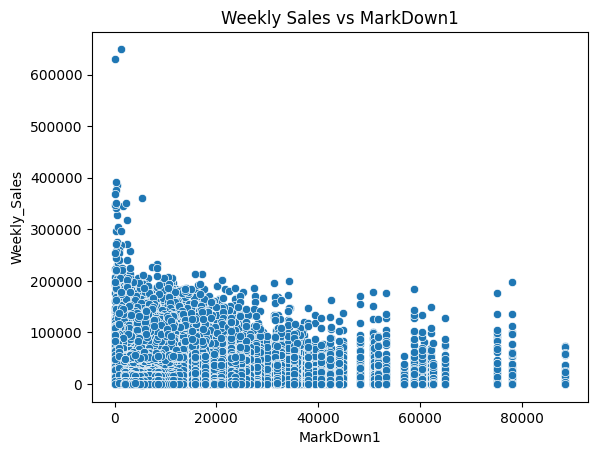

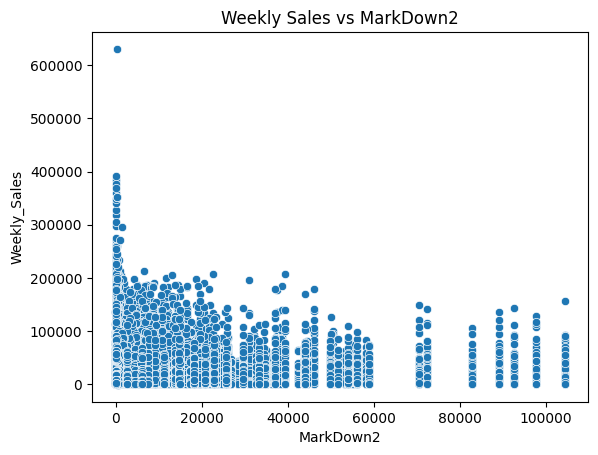

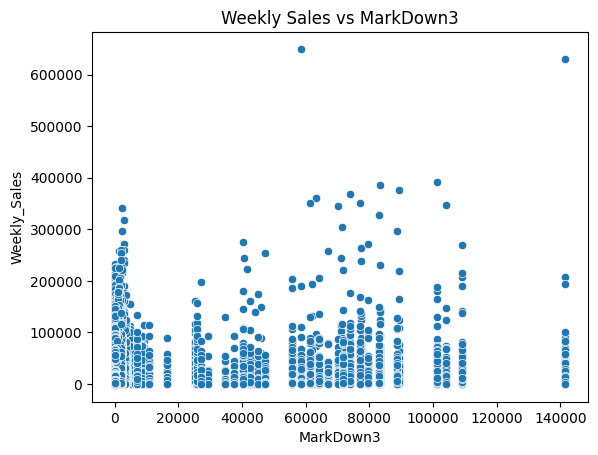

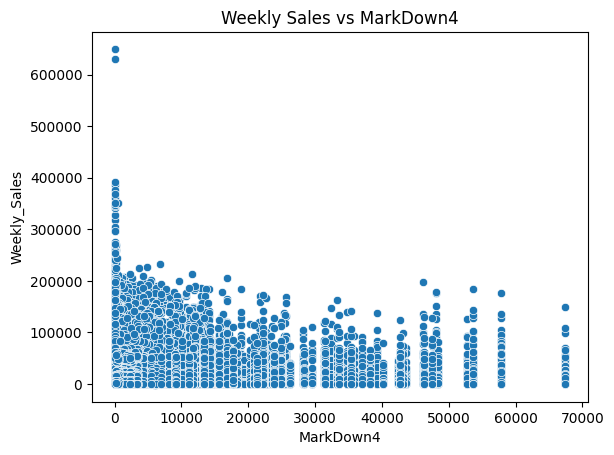

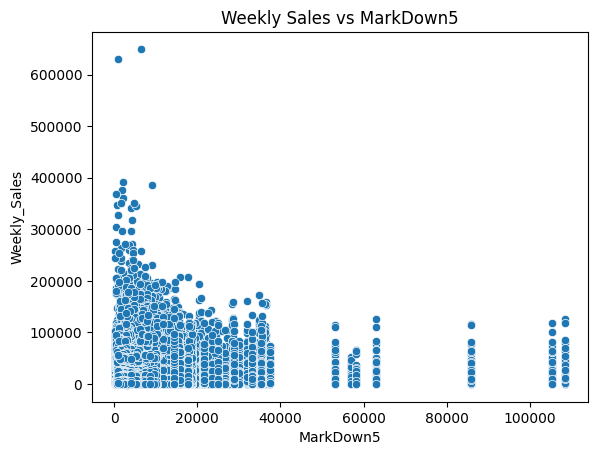

In [ ]:
# Weekly Sales vs Markdown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_columns:
    sns.scatterplot(data=combined_df, x=col, y='Weekly_Sales')
    plt.title(f'Weekly Sales vs {col}')
    plt.show()


We can see that there is no clear trend between all Markdown columns and weekly sales.

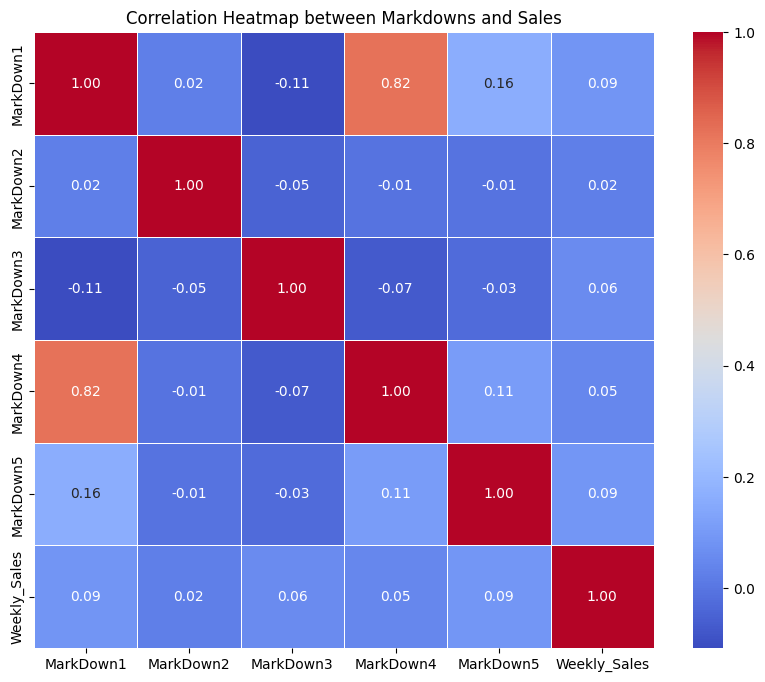

In [ ]:
# Calculate correlations between markdown columns and sales
correlation_matrix = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Heatmap between Markdowns and Sales')

# Display the plot
plt.show()

The low correlation values indicate that markdowns, as represented by these columns, may not have a strong linear relationship with sales in the dataset. This could suggest several things:

The markdowns may not be the primary driver of sales for the departments/stores we are analyzing.

The markdowns could be applied at different times, which may not align with when demand spikes (e.g., markdowns might not always coincide with holidays or other promotional events).

External factors like holidays, promotions, and other features (e.g., temperature, fuel prices) could be more important drivers of sales.

In [ ]:
import plotly.express as px

#monthly_sales = combined_df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Weekly_Sales'].mean().round(2)
monthly_sales =  combined_df.groupby('Date')['Weekly_Sales'].mean().round(2)
#monthly_sales = monthly_sales.astype('int64')

# Create the line plot using Plotly Express
fig = px.line(x = list(monthly_sales.index.to_list()),
              y = list(monthly_sales.values),
              title = 'Avg Sales by Month')

# Update axis labels
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Avg Sales in $')

# Update trace settings
fig.update_traces(mode = 'markers+lines')

# Show the plot
fig.show()

The line graph shows weekly sales over time, with steady sales between 40 million dollars and 50 million dollars, except for two sharp spikes during the holiday seasons in late 2010 and late 2011.

The graph shows monthly fluctuations in total sales, with sharp peaks around early 2011 and early 2012, while other months have lower and varying sales.



Obvious that sales are high during November, December, as it is has prime holiday as Black Friday, Thanks Giving, Chritmas and New Year and they have large discounts going on.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by month and calculate the average fuel price per month
monthly_fuel = combined_df.groupby(pd.Grouper(key='Date', freq='M'))['Fuel_Price'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_fuel.index, y=monthly_fuel.values, name="Monthly Fuel Price"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and Fuel Price Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Fuel Price", secondary_y=True)

# Show the plot
fig.show()

The line graph shows the monthly average fuel prices over time. Fuel prices exhibit fluctuations, with noticeable peaks around mid-2011 and mid-2012 and troughs in early 2010 and late 2011 which may effect the sales directly or indirectly by giving more chances to travel and shop more.

In [ ]:
avg_cpi = combined_df.groupby('Date')['CPI'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=avg_cpi.index, y=avg_cpi.values, name="Avg CPI rate"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and CPI Rate Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="CPI Rates", secondary_y=True)

# Show the plot
fig.show()

- CPI is always rising, and from previous correlation heatmap insights show that there is no strong relationship. However, the negative sign suggests that if CPI rates rise, we might anticipate a slight decline in sales, which is not very likely given the poor correlation.

In [ ]:
# Unemloyment rates
avg_unemp = combined_df.groupby('Date')['Unemployment'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=avg_unemp.index, y=avg_unemp.values, name="Avg Unemployment rate"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and Unemployment Rate Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Unemployment Rate", secondary_y=True)

# Show the plot
fig.show()

- Unemp rates are decreasing for every quater.
- moreover unemployments rates would be more useful if they are based on location rather than time based but we do not have locations in our data set.

- We can see that there is no much effects of CPI rates on sales.

In [ ]:
# Further analysis of markdown variable
mrk = combined_df.copy()
# Create a new column with the average of the markdown columns
mrk['avg_markdown'] = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']].mean(axis=1)

mrk.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,avg_markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,NaN


- We see no pattren from the markdowns and the sales, we can drop markdown features.

In [ ]:
# Drope markdowns
combined_df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

IsHoliday_x
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


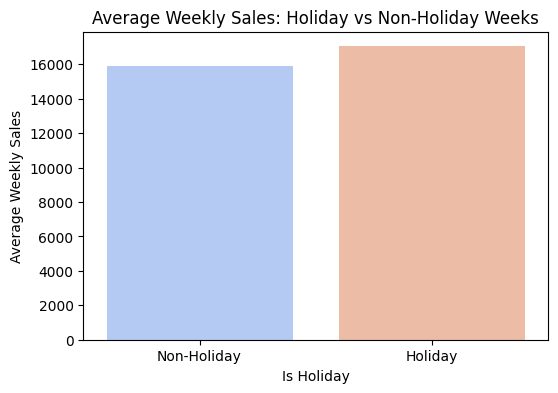

In [ ]:
# Check the effect of holidays (IsHoliday_x) on weekly sales
holiday_sales = combined_df.groupby('IsHoliday_x')['Weekly_Sales'].mean()

# Print the average sales for holiday and non-holiday weeks
print(holiday_sales)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


The graph shows that average weekly sales during holidays are slightly higher than those during non-holidays, indicating a small increase in sales during holiday weeks.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate weekly sales by date
weekly_sales = combined_df.groupby('Date')['Weekly_Sales'].mean()

# Perform seasonal decomposition
result = seasonal_decompose(weekly_sales, model='additive', period=4)  # Assuming weekly data with annual seasonality

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Create a subplot figure
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=('Trend Component', 'Seasonal Component', 'Residual Component'),
    vertical_spacing=0.1
)

# Add Trend Component to subplot
fig.add_trace(
    go.Scatter(x=weekly_sales.index, y=trend, mode='lines', name='Trend', line=dict(color='blue')),
    row=1, col=1
)

# Add Seasonal Component to subplot
fig.add_trace(
    go.Scatter(x=weekly_sales.index, y=seasonal, mode='lines', name='Seasonal', line=dict(color='orange')),
    row=2, col=1
)

# Add Residual Component to subplot
fig.add_trace(
    go.Scatter(x=weekly_sales.index, y=residual, mode='markers', name='Residual', line=dict(color='green')),
    row=3, col=1
)

# Update layout to make the plot neat
fig.update_layout(
    title='Seasonal Decomposition of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Value',
    height=850,
    width=1300,
    showlegend=False,
    xaxis_rangeslider_visible=False
)

# Update x-axis to make it more readable
fig.update_xaxes(tickangle=45,  showgrid=True)

# Show the plot
fig.show()


The graph shows monthly fluctuations in total sales, with sharp peaks around early 2011 and early 2012, while other months have lower and varying sales.

It is obvious that sales are high during November and December, as it has prime holidays such as Black Friday, Thanksgiving, Christmas, and New Year, and they have large discounts going on.



In [ ]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [ ]:
# plot weekly sales  on Date store wise
import plotly.express as px

# Store wise sales data
df= combined_df.groupby(['Date','Store'])['Weekly_Sales'].mean().reset_index()

nu = input("Enter Store number(1-45) :" )


fig = px.line(df.query(f'Store == {nu}'), x='Date', y='Weekly_Sales', title='Weekly Sales Over Time')

fig.update_layout(title= f'Weely Sales Over Time for Store {nu}')

fig.show()


Enter Store number(1-45) :33


In [ ]:
# min date in data set
start , end = min(combined_df['Date']), max(combined_df['Date'])
start, end

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
# Extract dates for fetching Holiday data
# Generate the dates with a weekly frequency (every Friday)
dates = pd.date_range(start=start, end=end, freq='W-FRI')

# Convert to a DataFrame for the desired structure
dates_df = pd.DataFrame(dates, columns=['Date'])

# Display the first few rows
dates_df

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
138,2012-09-28
139,2012-10-05
140,2012-10-12
141,2012-10-19


In [ ]:
! pip install nixtla

In [ ]:
# Extract US Holidays
from nixtla.date_features import CountryHolidays

# Extract US Holidays
us_holidays = CountryHolidays(countries=['US'])

holidays_df = us_holidays(dates).reset_index(names='Date')

In [ ]:
holidays_df

,Date,US_New Year's Day,US_New Year's Day (observed),US_Memorial Day,US_Independence Day,US_Independence Day (observed),US_Labor Day,US_Veterans Day,US_Thanksgiving,US_Christmas Day,US_Christmas Day (observed),US_Martin Luther King Jr. Day,US_Washington's Birthday,US_Veterans Day (observed)
0,2010-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,0,0,0,0,0,0,0,0,0,0,0,0,0
139,2012-10-05,0,0,0,0,0,0,0,0,0,0,0,0,0
140,2012-10-12,0,0,0,0,0,0,0,0,0,0,0,0,0
141,2012-10-19,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop IsHoliday_x and IsHoliday_y
combined_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)

#Merge holiday dataset on Date
combined_df = combined_df.merge(holidays_df, on='Date',how='left')


In [ ]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Type', 'Size', 'US_New Year's Day',
       'US_New Year's Day (observed)', 'US_Memorial Day',
       'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
       'US_Veterans Day', 'US_Thanksgiving', 'US_Christmas Day',
       'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
       'US_Washington's Birthday', 'US_Veterans Day (observed)'],
      dtype='object')

In [ ]:
df = combined_df.copy()

# Separete Sales data in coorect shape
df = df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

df.head()

,Date,Weekly_Sales
0,2010-02-05,16836.121997
1,2010-02-12,16352.056032
2,2010-02-19,16216.658979
3,2010-02-26,14899.549688
4,2010-03-05,15921.015727


In [ ]:
# Exogenous Features

demo = combined_df.copy()
demo = demo.groupby(['Date']).agg( {
    'Temperature': 'mean',        # Mean temperature
    'CPI': 'mean',                # Mean CPI
    'Fuel_Price': 'mean',         # Mean fuel price
    'Unemployment': 'mean',       # Mean unemployment
    'Size': 'mean'}  )

# Reset the index to access columns
demo = demo.reset_index()


demo.set_index(['Date'], inplace=True)



demo= demo.merge(holidays_df, on='Date', how='left')

demo

,Date,Temperature,CPI,Fuel_Price,Unemployment,Size,US_New Year's Day,US_New Year's Day (observed),US_Memorial Day,US_Independence Day,US_Independence Day (observed),US_Labor Day,US_Veterans Day,US_Thanksgiving,US_Christmas Day,US_Christmas Day (observed),US_Martin Luther King Jr. Day,US_Washington's Birthday,US_Veterans Day (observed)
0,2010-02-05,33.277942,167.398405,2.717869,8.576731,137430.535364,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,33.361810,167.384138,2.696102,8.567309,137622.780785,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,37.038310,167.338966,2.673666,8.576351,137278.637219,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,38.629563,167.691019,2.685642,8.561375,137346.344629,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,42.373998,167.727351,2.731816,8.572689,137576.841033,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,68.151759,175.919639,3.858245,7.225855,136009.082039,0,0,0,0,0,0,0,0,0,0,0,0,0
139,2012-10-05,65.456811,175.998254,3.848435,6.942141,136334.755712,0,0,0,0,0,0,0,0,0,0,0,0,0
140,2012-10-12,57.687284,176.123786,3.897425,6.952682,136228.789298,0,0,0,0,0,0,0,0,0,0,0,0,0
141,2012-10-19,60.152756,176.295499,3.878413,6.948928,135892.584068,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Merge Sales with features
df = df.merge(demo, on='Date', how='left')

df.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price',
       'Unemployment', 'Size', 'US_New Year's Day',
       'US_New Year's Day (observed)', 'US_Memorial Day',
       'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
       'US_Veterans Day', 'US_Thanksgiving', 'US_Christmas Day',
       'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
       'US_Washington's Birthday', 'US_Veterans Day (observed)'],
      dtype='object')

In [ ]:
def calculate_sales_velocity(df, store_number=None, dept_number=None):
    """
    Calculates and normalizes sales velocity for overall data, store, or department.

    Args:
    df (pd.DataFrame): The input DataFrame.
    store_number (int, optional): The store number to filter by. Defaults to None.
    dept_number (int, optional): The department number to filter by. Defaults to None.

    Returns:
    float: The normalized sales velocity.
    """
    velocity_df = df.copy()

    if store_number and dept_number:
        velocity_df = velocity_df.query('Store == @store_number and Dept == @dept_number')
    elif store_number:
        velocity_df = velocity_df.query('Store == @store_number')

    velocity_df = velocity_df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

    n_days = velocity_df["Date"].nunique()
    Sales_n = velocity_df["Weekly_Sales"].sum()
    win_rate = 1  # Assuming since every week has sales

    sales_velocity = (Sales_n * win_rate) / n_days

    norm = (sales_velocity - velocity_df["Weekly_Sales"].min()) / (velocity_df["Weekly_Sales"].max() - velocity_df["Weekly_Sales"].min())

     # Format norm to two decimal places
    formatted_norm = f"{norm:.2f}"

    return formatted_norm

In [ ]:
calculate_sales_velocity(combined_df, store_number=33, dept_number= 33)

'0.15'

**Sales velocity** represents the speed at which you sell products. Sometimes, it is also called inventory velocity

- High Sales Velocity: Requires frequent restocking to avoid stockouts, with adjustments for delivery and sorting processes in multi-warehouse setups.

- Low Sales Velocity: Calls for minimal restocking to prevent overstock. Instead, focus on advertising, customer retention, and improving customer experience to boost sales.

## Predictive Models :

### TimeGPT

- TimeGPT is a production-ready generative pretrained transformer for time series. It’s capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code.

- TimeGPT model is not based on any existing large language model(LLM). Instead, it is independently trained on a vast amount of time series data, and the large transformer model is designed to minimize the forecasting error.

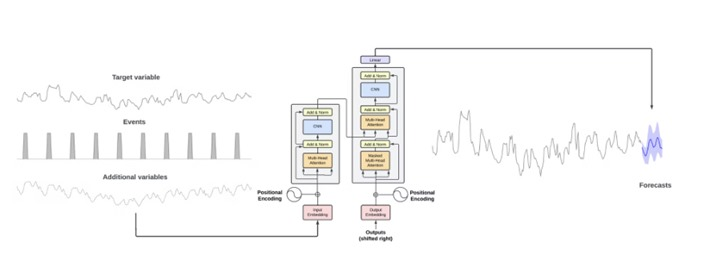

- Architecture This foundation model is based on self-attention, which was first presented in the paper Attention is all you need.





In [ ]:
from nixtla import NixtlaClient

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-odp8YhH8CEjt2wGiZ5zP5XCHoeMAFCj0hGGzpBDIA2QIcEZz4RqI98kxn7dFuRvbAIQaX6OXfDmL7vFL'
)

In [ ]:
# Overall forcaste
def get_forecasts(df):

      #df= combined_df.copy()

      #input_df = df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

      fcst_store = nixtla_client.forecast(
          df= df,
          h = 24,                                  #  Forecast horizon of 24 timestamps 24 weeks 6 months
          freq='W-FRI',                           # Frequency of date is Weekly
          time_col='Date',
          model='timegpt-1-long-horizon',         # Long horizon model
          target_col='Weekly_Sales',
          finetune_steps=15,                       # Model will go through 5 iterations of training
          X_df= df.drop(columns=['Weekly_Sales'])[:24], #Exogenous Features
          level = [50,90,80],
          add_history = True
      )

      fig = nixtla_client.plot(
          df = df,
          forecasts_df = fcst_store,
          time_col = 'Date',
          target_col = 'Weekly_Sales',
          engine = 'plotly',
          #max_insample_length= 24,
          level = [50,90,80]
        )

      fig.update_layout(
            title_text="Sales forcast for next 6 months",  # Your existing title
            height=250,
            width=1000
        )
      return fig, fcst_store

fig, fcst_df = get_forecasts(df)
fig

In [ ]:
fcst_df

,Date,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2011-11-04,17295.402,18044.377,18718.479,19121.902,16546.428,15872.326,15468.9030
1,2011-11-11,17417.477,18166.451,18840.553,19243.977,16668.502,15994.400,15590.9780
2,2011-11-18,16616.752,17365.727,18039.828,18443.252,15867.776,15193.676,14790.2530
3,2011-11-25,19404.130,20153.105,20827.207,21230.630,18655.156,17981.055,17577.6300
4,2011-12-02,16530.150,17279.125,17953.227,18356.650,15781.175,15107.074,14703.6510
...,...,...,...,...,...,...,...,...
71,2013-03-15,16396.390,16449.396,16481.200,16491.800,16343.384,16311.580,16300.9795
72,2013-03-22,16438.158,16708.800,16871.186,16925.312,16167.518,16005.133,15951.0040
73,2013-03-29,16373.095,16586.074,16713.863,16756.459,16160.115,16032.327,15989.7300
74,2013-04-05,16559.521,17571.324,18178.408,18380.768,15547.717,14940.635,14738.2730


In [ ]:
fcst_df

start_date = fcst_df['Date'].min()
end_date = fcst_df['Date'].max()

print(start_date, end_date)

eval_df = df[['Date','Weekly_Sales']]
eval_df = eval_df[(eval_df['Date'] >= start_date) & (eval_df['Date'] <= end_date)].reset_index(drop=True)

print(eval_df.shape)
print(fcst_df.shape)

# Merge
eval_df = fcst_df.merge(eval_df, on=['Date'])
print(eval_df.shape)


2011-11-04 00:00:00 2013-04-12 00:00:00
(52, 2)
(76, 8)
(52, 9)


In [ ]:
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, rmse, smape

In [ ]:
eval_df["index"]= 1
eval_df

,Date,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90,Weekly_Sales,index
0,2011-11-04,17295.402,18044.3770,18718.479,19121.902,16546.4280,15872.326,15468.9030,16471.071192,1
1,2011-11-11,17417.477,18166.4510,18840.553,19243.977,16668.5020,15994.400,15590.9780,16348.811046,1
2,2011-11-18,16616.752,17365.7270,18039.828,18443.252,15867.7760,15193.676,14790.2530,15683.546288,1
3,2011-11-25,19404.130,20153.1050,20827.207,21230.630,18655.1560,17981.055,17577.6300,22043.563476,1
4,2011-12-02,16530.150,17279.1250,17953.227,18356.650,15781.1750,15107.074,14703.6510,16496.511854,1
5,2011-12-09,17848.440,18597.4140,19271.516,19674.940,17099.4650,16425.363,16021.9400,18458.853056,1
6,2011-12-16,18921.041,19670.0160,20344.117,20747.541,18172.0660,17497.965,17094.5410,19942.149333,1
7,2011-12-23,20188.080,20937.0550,21611.156,22014.580,19439.1050,18765.004,18361.5800,25437.146122,1
8,2011-12-30,17652.457,18401.4320,19075.533,19478.957,16903.4820,16229.381,15825.9580,15332.154858,1
9,2012-01-06,16027.256,16776.2300,17450.332,17853.756,15278.2800,14604.180,14200.7570,15121.231736,1


In [ ]:
metrics = [mae, smape]

evaluation = evaluate(
    eval_df,
    target_col='Weekly_Sales',
    metrics=metrics,
    models=['TimeGPT'],
    id_col='index'
)
evaluation

,index,metric,TimeGPT
0,1,mae,716.007383
1,1,smape,0.021090


- After evaluation the metrics are like this MAE - 716 and SMAPE - 0.021


In [ ]:
# Store wise forcasting
df= combined_df.groupby(['Date','Store'])['Weekly_Sales'].mean().reset_index()

input_df = df.query('Store == 33')

In [ ]:
# Store wise forcasting
def get_forecasts_Store(data, store_number):
  '''
          This is the function to get the store wise forcasting

          Args : Dataset, Store number
          Returns : Plotly figure
  '''
    df = data.copy()

    df= combined_df.groupby(['Date','Store'])['Weekly_Sales'].mean().reset_index()

    input_df = df.query('Store == 33')

    fcst_store = nixtla_client.forecast(
    df= input_df,
    h = 24,                                  #  Forecast horizon of 24 timestamps 24 weeks 6 months
    freq='W-FRI',                           # Frequency of date is Weekly
    time_col='Date',
    model='timegpt-1-long-horizon',         # Long horizon model
    target_col='Weekly_Sales',
    finetune_steps=15,                       # Model will go through 5 iterations of training
    level = [50,90,80],
    add_history = True
    )

    fig = nixtla_client.plot(
        df = input_df,
        forecasts_df = fcst_store,
        time_col = 'Date',
        target_col = 'Weekly_Sales',
        engine = 'plotly',
        #max_insample_length= 24,
        level = [50,90,80]
      )

    fig.update_layout(
          title_text=f"{store_number} Store's sales forcast for next 6 months ",  # Your existing title
          height=250,
          width=1000
      )
    return fig


get_forecasts_Store(combined_df, 33)

In [ ]:
# Store --> dept wise

def get_forecasts_Dept(data, store_number, dept_number):
  '''
      This is the fuction to get the department wise forcasting

      Args : Dataset, Store number, Department number
      Returns : Plotly figure
  '''
    df= data.copy() # Create a copy of combined_df instead of grouping directly


    df = df.query('Store == @store_number') # Now you can use .query() on the DataFrame and select store number

    df['Dept'].nunique()  # number of departments a store has

    input_df = df.query('Dept == @dept_number') # select dep_num


    try :

      fcst_store = nixtla_client.forecast(
          df= input_df,
          h = 24,                                  #  Forecast horizon of 24 timestamps 24 weeks 6 months
          freq='W-FRI',                           # Frequency of date is Weekly
          time_col='Date',
          model='timegpt-1-long-horizon',         # Long horizon model
          target_col='Weekly_Sales',
          finetune_steps=15,                       # Model will go through 5 iterations of training
          level = [50,90,80],
          #add_history = True
      )

    except ValueError as e :
      print(f"Deparment number {dept_number} is not on sales for entier time to forecaste")

    fig = nixtla_client.plot(
        df = input_df,
        forecasts_df = fcst_store,
        time_col = 'Date',
        target_col = 'Weekly_Sales',
        engine = 'plotly',
        #max_insample_length= 24,
        level = [50,90,80]
      )

    fig.update_layout(
          title_text=f" Next 6 months forecast for Department {dept_number} in Store {store_number} ",  # Your existing title
          height=250,
          width=1000
      )

    return fig
get_forecasts_Dept(combined_df, 25, 10)

## Random Forest

In [ ]:
# Dataset used
aggregated_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [ ]:
aggregated_df = aggregated_df.groupby(['Date'], as_index=False).agg({
    'Weekly_Sales': 'mean',        # Sum weekly sales
    'Temperature': 'mean',        # Average Temperature
    'Fuel_Price': 'mean',         # Average Fuel Price
    'CPI': 'mean',                # Average CPI
    'Unemployment': 'mean',       # Average Unemployment
    'Size': 'mean',               # Average Size
    'IsHoliday_x': 'mean'       # Average Holiday status (as numeric)
})

In [ ]:
aggregated_df['Date'] = pd.to_datetime(aggregated_df['Date'], format='%d/%m/%Y')

In [ ]:
# Add lag features to incorporate the effect of previous weeks' sales:

aggregated_df['Lag_1_Week'] = aggregated_df['Weekly_Sales'].shift(1)
aggregated_df['Lag_2_Weeks'] = aggregated_df['Weekly_Sales'].shift(2)


In [ ]:
# Add rolling averages
from sklearn.impute import SimpleImputer

aggregated_df['Rolling_4_Week'] = aggregated_df['Weekly_Sales'].rolling(window=4).mean()
# aggregated_df['Rolling_5_Week'] = aggregated_df['Weekly_Sales'].rolling(window=5).mean()

# Impute NaNs (using mean strategy)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' if preferred
aggregated_df[['Lag_1_Week', 'Lag_2_Weeks', 'Rolling_4_Week']] = imputer.fit_transform(
    aggregated_df[['Lag_1_Week', 'Lag_2_Weeks', 'Rolling_4_Week']]
)

# Check if NaNs are handled
print(aggregated_df.isnull().sum())

Date              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Size              0
IsHoliday_x       0
Lag_1_Week        0
Lag_2_Weeks       0
Rolling_4_Week    0
dtype: int64


In [ ]:
# Extract date-related features:
aggregated_df['Year'] = aggregated_df['Date'].dt.year

aggregated_df['Month'] = aggregated_df['Date'].dt.month
aggregated_df['Day_of_Week'] = aggregated_df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday


In [ ]:
from sklearn.model_selection import train_test_split

# Filter training data (2010 and 2011) and testing data (2012)
train_df = aggregated_df[aggregated_df['Year'].isin([2010, 2011])]
test_df = aggregated_df[aggregated_df['Year'] == 2012]

# Separate features (X) and target (y) for training and testing sets
X_train = train_df.drop(columns=['Weekly_Sales', 'Date','Year'])
y_train = train_df[['Weekly_Sales', 'Date']]
X_test = test_df.drop(columns=['Weekly_Sales', 'Date', 'Year'])
y_test = test_df[['Weekly_Sales', 'Date']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np
import plotly.graph_objects as go

In [ ]:
# Define SMAPE function to calculate metrics
def smape(y_true, y_pred):
    # Ensure no division by zero and calculate SMAPE
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Handle cases where both y_true and y_pred are zero
    return 2 * np.mean(diff)


In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred)
rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred, squared=False)
smape_score = smape(y_test['Weekly_Sales'], y_pred)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Sort the data by date to avoid zigzag patterns
y_test_sorted = y_test.sort_values(by='Date')
y_pred_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Predicted vs Actual Weekly Sales (Random Forest)',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()


SMAPE: 0.12600840072527475
Mean Absolute Error (MAE): 2103.042574525703
Root Mean Squared Error (RMSE): 2287.18258931715


- Without Hyperparameter tuning the performance of RandomForest is like this MAE - 2103.04 and SMAPE - 0.12.

In [ ]:
# Hyperparameter tuning for RandomForest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train['Weekly_Sales'])

best_params_rf = grid_search_rf.best_estimator_
# best_params_
print(f"Best parameters: {best_params_rf}")
y_pred= best_params_rf.predict(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      random_state=42)


In [ ]:
# y_pred= grid_search.predict(X_test)

y_pred= best_params_rf.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred)
rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred, squared=False)
smape_score = smape(y_test['Weekly_Sales'], y_pred)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Sort the data by date to avoid zigzag patterns
y_test_sorted = y_test.sort_values(by='Date')
y_pred_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Predicted vs Actual Weekly Sales (Random Forest)',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()


SMAPE: 0.11472964967304126
Mean Absolute Error (MAE): 1909.1066440287987
Root Mean Squared Error (RMSE): 2172.5769964751335


- After Hyperparameter tunning The performance of RandomForest is like this MAE- 1909.10 and SMAPE - 0.11

## XG Boost

In [ ]:
# Initialize and fit the XGBoost model
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred_xg = xg_model.predict(X_test)

# Evaluate the model
xg_rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg, squared=False)  # Root Mean Squared Error
xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.11786450574865677
XGBoost RMSE: 2078.117066321338
XGBoost MAE: 1957.200897935475


 - Without Hyperparameter tunning The performance of XGboost is like this MAE- 1957.20 and SMAPE - 0.11


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Using MSE as scoring
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train['Weekly_Sales'])

# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)

# Predict using the best model
best_model_xgb = random_search.best_estimator_
y_pred_xg = best_model_xgb.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score (Negative MSE): -2446185.64901817


In [ ]:
# Evaluate the model
xg_rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg, squared=False)  # Root Mean Squared Error
xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.05048675854997637
XGBoost RMSE: 1167.8250804542872
XGBoost MAE: 818.1701330195078


- After Hyperparameter tunning using RandomizedSearchCV. The performance of XGboost is like this MAE- 1167.82 and SMAPE - 0.05


In [ ]:
# hypertuning for XG Boost using GridSearch

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid
xgb_model = XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train['Weekly_Sales'])

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score (neg_mean_squared_error): ", grid_search.best_score_)

# Predict using the best model
best_model_xgb1 = grid_search.best_estimator_
y_pred_xg = best_model_xgb1.predict(X_test)


Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best score (neg_mean_squared_error):  -2998173.4018512396


In [ ]:
# Evaluate the model
xg_rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg, squared=False)  # Root Mean Squared Error
xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.030798979126162758
XGBoost RMSE: 662.7223057191973
XGBoost MAE: 482.27961310613875


- AFter Hyperparameter tunning using GridSearchCV. The performance of XGboost is like this MAE- 662.72 and SMAPE - 0.03

## Ensemble of Random Forest and XGBoost

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create the ensemble model (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[('rf', best_params_rf), ('xg', best_model_xgb1)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_rmse = mean_squared_error(y_test['Weekly_Sales'], y_pred_ensemble, squared=False)  # RMSE
ensemble_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_ensemble)  # MAE
smape_score = smape(y_test['Weekly_Sales'], y_pred_ensemble)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"Ensemble Model RMSE: {ensemble_rmse}")
print(f"Ensemble Model MAE: {ensemble_mae}")

# # Plot Predicted vs Actual values
# plt.figure(figsize=(10, 6))
# plt.plot(y_test['Date'], y_test['Weekly_Sales'], color='blue', label='Actual')
# plt.plot(y_test['Date'], y_pred_xg, color='red', label='Predicted')
# # plt.scatter(y_test['Weekly_Sales'], y_pred_ensemble, color='blue', alpha=0.6, label='Predicted Values')  # Blue dots for predicted values
# # plt.plot([min(y_test['Weekly_Sales']), max(y_test['Weekly_Sales'])], [min(y_test['Weekly_Sales']), max(y_test['Weekly_Sales'])], color='red', linestyle='--', label='Ideal (y=x)')  # Red line for ideal predictions
# plt.title('Predicted vs Actual Values (Ensemble Model)')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')

# # Add a legend to the plot
# plt.legend()

# # Show the plot
# plt.show()

import plotly.graph_objects as go

# Sort the data by date to ensure smooth plotting
y_test_sorted = y_test.sort_values(by='Date')
y_pred_ensemble_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_ensemble))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add ensemble model predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_ensemble_sorted,
    mode='lines',
    name='Predicted (Ensemble)',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Ensemble Model Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()



SMAPE: 0.0691865453219877
Ensemble Model RMSE: 1312.10443410744
Ensemble Model MAE: 1113.492920854777


- Performance of ensemble model on Random Forest and XGBoost is MAE - 1113.49 and SMAPE - 0.069

## Arima

In [ ]:
df_ariima['Date'] = pd.to_datetime(df_ariima['Date'], format='%y/%m/%d')
# sales data
df_ariima = df_ariima.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [ ]:
df_ariima.head()

,Date,Weekly_Sales
0,2010-02-05,16836.121997
1,2010-02-12,16352.056032
2,2010-02-19,16216.658979
3,2010-02-26,14899.549688
4,2010-03-05,15921.015727


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Select the time series for Weekly_Sales
weekly_sales = df_ariima

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales.iloc[:train_size], weekly_sales.iloc[train_size:]



p = list(range(1,24))
d = list(range(0,3))
q = list(range(1,3))

# hyperparameters
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
      for d in d_values:
        for q in q_values:
          order = (p,d,q)
          try:
            model = ARIMA(train, order=(p,d,q))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test))
            mae = mean_absolute_error(test, forecast)
            if mae < best_score:
              best_score, best_cfg = mae, order
              print('ARIMA%s MAE=%.3f' % (order,mae))
          except:
            continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))
    return best_cfg


best_param = evaluate_models(train, p, d, q)
print(best_param)
# Fit ARIMA model - adjust (p, d, q) as needed
model = ARIMA(train['Weekly_Sales'], order=best_param)
fitted_model = model.fit()

# Forecast for the test period
forecast = fitted_model.forecast(steps=len(test['Weekly_Sales']))

# Calculate MAE
mae = mean_absolute_error(test['Weekly_Sales'], forecast)

# Calculate SMAPE
def smape(y_true, y_pred):
    return  np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_value = smape(test['Weekly_Sales'], forecast)

# Output results
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")


(1, 0, 1)
MAE: 513.6242957442204
SMAPE: 0.032482833570008966


In [ ]:
first_date = test['Date'].iloc[0]
first_date

Timestamp('2012-04-13 00:00:00')

In [ ]:
test

,Date,Weekly_Sales
114,2012-04-13,15663.171451
115,2012-04-20,15150.430178
116,2012-04-27,14799.187167
117,2012-05-04,15947.275103
118,2012-05-11,15784.015806
119,2012-05-18,15856.396620
120,2012-05-25,16284.414590
121,2012-06-01,16405.589439
122,2012-06-08,16774.044520
123,2012-06-15,16377.574662


In [ ]:
test.index[0]

114

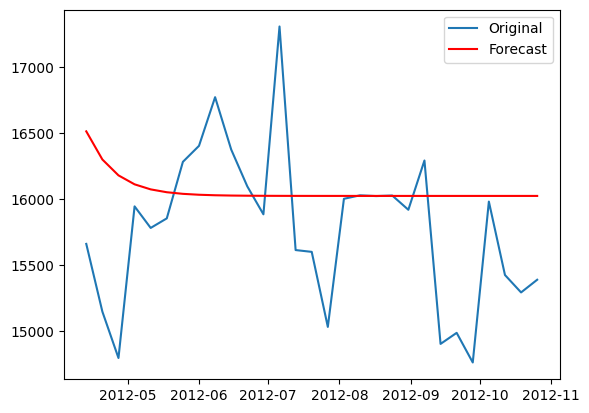

In [ ]:
plt.plot(test['Date'], test['Weekly_Sales'], label='Original')
plt.plot(pd.date_range(first_date , periods=len(test), freq='W-FRI'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

- Performance of ARIMA model, MAE - 531.624 and SMAPE - 0.032

## Contingency Table

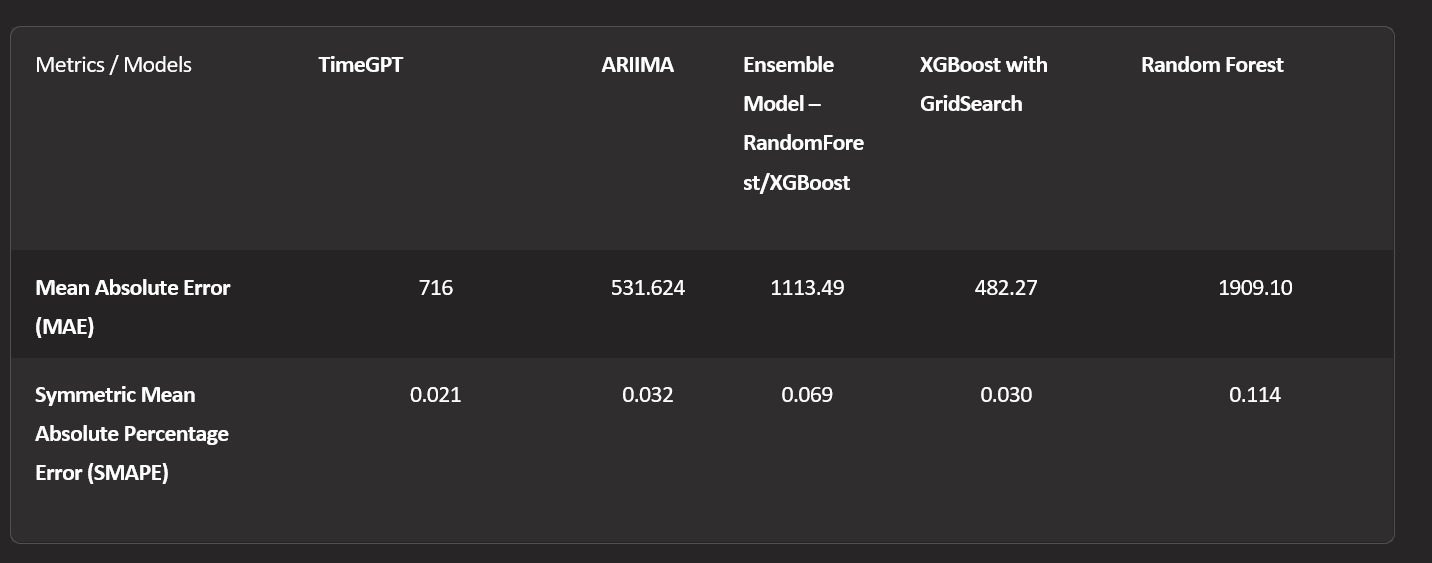


- We can see that TimeGPT is performing well among over models, with best SMAPE scores and giving promising results by graphs

## Developing and Deploying Dashboard :

To aid in decision-making, a dashboard with multiple levels was created. This dashboard offers comprehensive data on sales by department, store, and overall. Additionally, it displays important KPIs like sales velocity, the top ten departments and locations, and the months with the highest performance. Walmart is able to improve operational efficiency and customer satisfaction by using these insights to match warehouse management and inventory strategies with anticipated demand.

This all-encompassing strategy shows how combining visualization and predictive analytics technologies can lead to efficient retail management and decision-making.




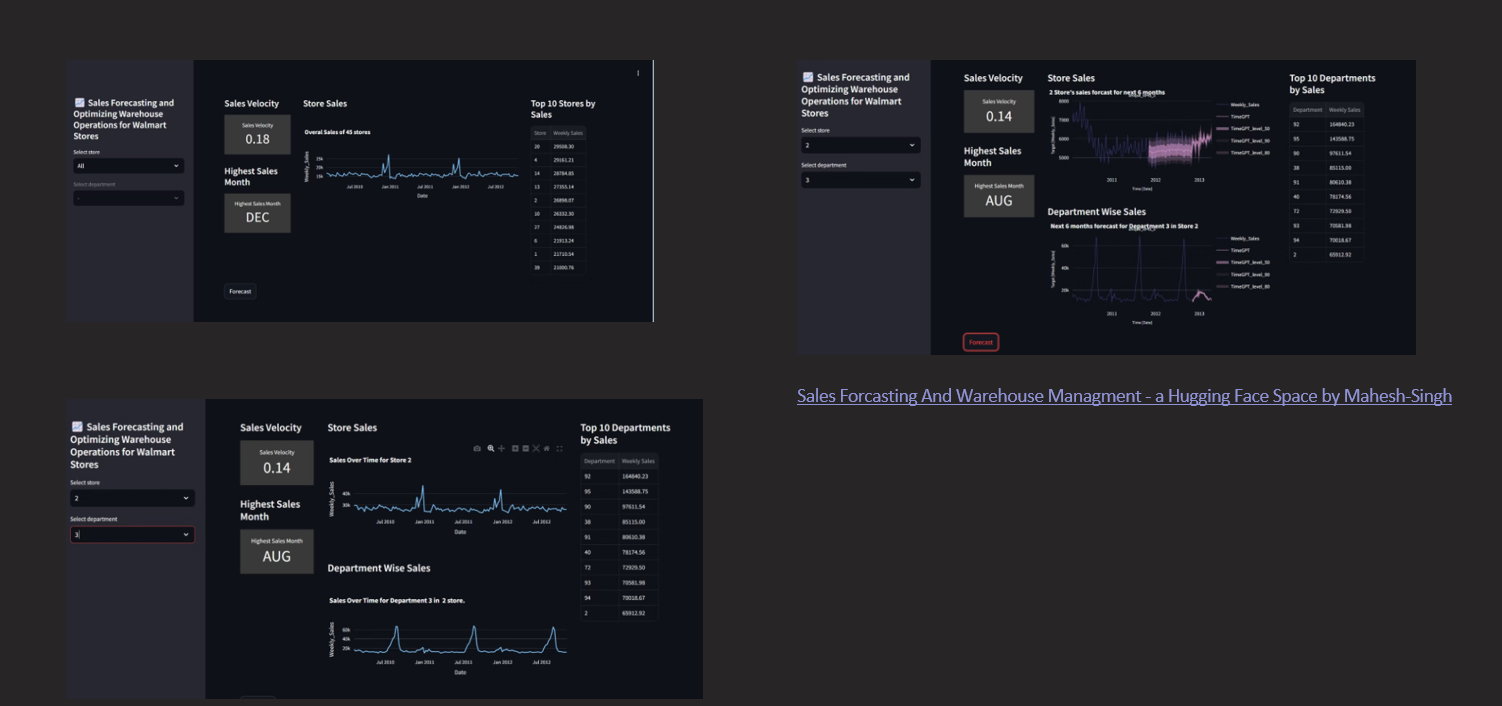

[The live dashboard can be accessed via this link. ](https://huggingface.co/spaces/Mahesh-Singh/Sales_forcasting_and_Warehouse_managment)

## Coclusions

- We can infer that there is an adverse relationship between the CPI and unemployment rates, while there is no correlation between gas prices and any of these variables.

- Sales velocity is a key performance indicator (KPI) that is based on sales and aids in warehouse operations decision-making by minimizing overstock and understock scenarios.

- From the bunch of predictive models timegpt out performsother models with best scores.

### Challenges Experienced

- Maintaining the dataset's structure for each operation is the first problem. Since this dataset is hierarchical, it must be restructured for each model and procedure.

- The second difficulty we encountered was computational; on Google Colab with a T4 GPU, the models with hyperparameter tuning took at least 20 minutes to run and execute.





